<a href="https://colab.research.google.com/github/Nicolas-HGS/Digital-Image-Processing/blob/main/Effect_of_the_number_of_gray_levels_on_the_quality_of_an_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Importing libraries and modules

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# OPENING AND IDENTIFYING THE IMAGE FILE

Im = Image.open("Imagem_niveis_bits.jpg")

# Transform the variable Im into a numpy array, converting its scale from 0-255 to 0-1

Im = np.array(Im)

# Creation of a variable containing the copy of the image variable to be applied
# in the thresholding technique

imagem_cinza = Im.copy()

In [13]:
# Loop to convert the variable Im into a gray image

for y in range(Im.shape[0]): # Line scanning
    for x in range(Im.shape[1]): # Column scanning

    # Converts the intensities of the red, green and blue components of the current pixel of the image
    # to the same intensity, calculating the average of these components and resulting in a gray pixel

        Im[y,x] = np.sum(Im[y, x])/3

In [14]:
# Variable D stores the desired number of levels

D = 2

# Creating a list to store intensity values from the desired number of levels

intensidades = []

# Creating a loop to store the possible intensities of pixels
# based on the desired number of levels, following the equation: i*255 / (D-1)

for i in range(0,D):
    intensidades.append((i*255/(D-1)))

In [15]:
# Creation of a variable containing the copy of Im variable,
# which will store the modified image with the new number of levels

Im_modificada = Im.copy()

# Loop to create the image with the new pixels intensities

for x in range(Im.shape[0]): # LOOP to go through the lines of the image
    for y in range(Im.shape[1]): # LOOP to go through the rows of the image

        # Subtract the current intensity value of the pixel of the image from the
        # intensity list, creating a numpy array with the differences modules

        differences = abs(Im[x,y,0] - intensidades)

        # Note that as all pixel color componenets have the same value,
        # just make the subtraction in only a single layer, in this case, the zero
        # layer was chosen

        # Assign a new intensity to the pixel of the previous step,
        # which will be that on the intensities list which is more close
        # of the current intensity value from him

        Im_modificada[x, y] = intensidades[int(min(np.where(differences == min(differences))[0]))]

        # The value of the intensity list that is closest to the current pixel intensity value is discovered
        # by the lowest value in module generated by the difference between the current pixel instensity and
        # the intensity list values

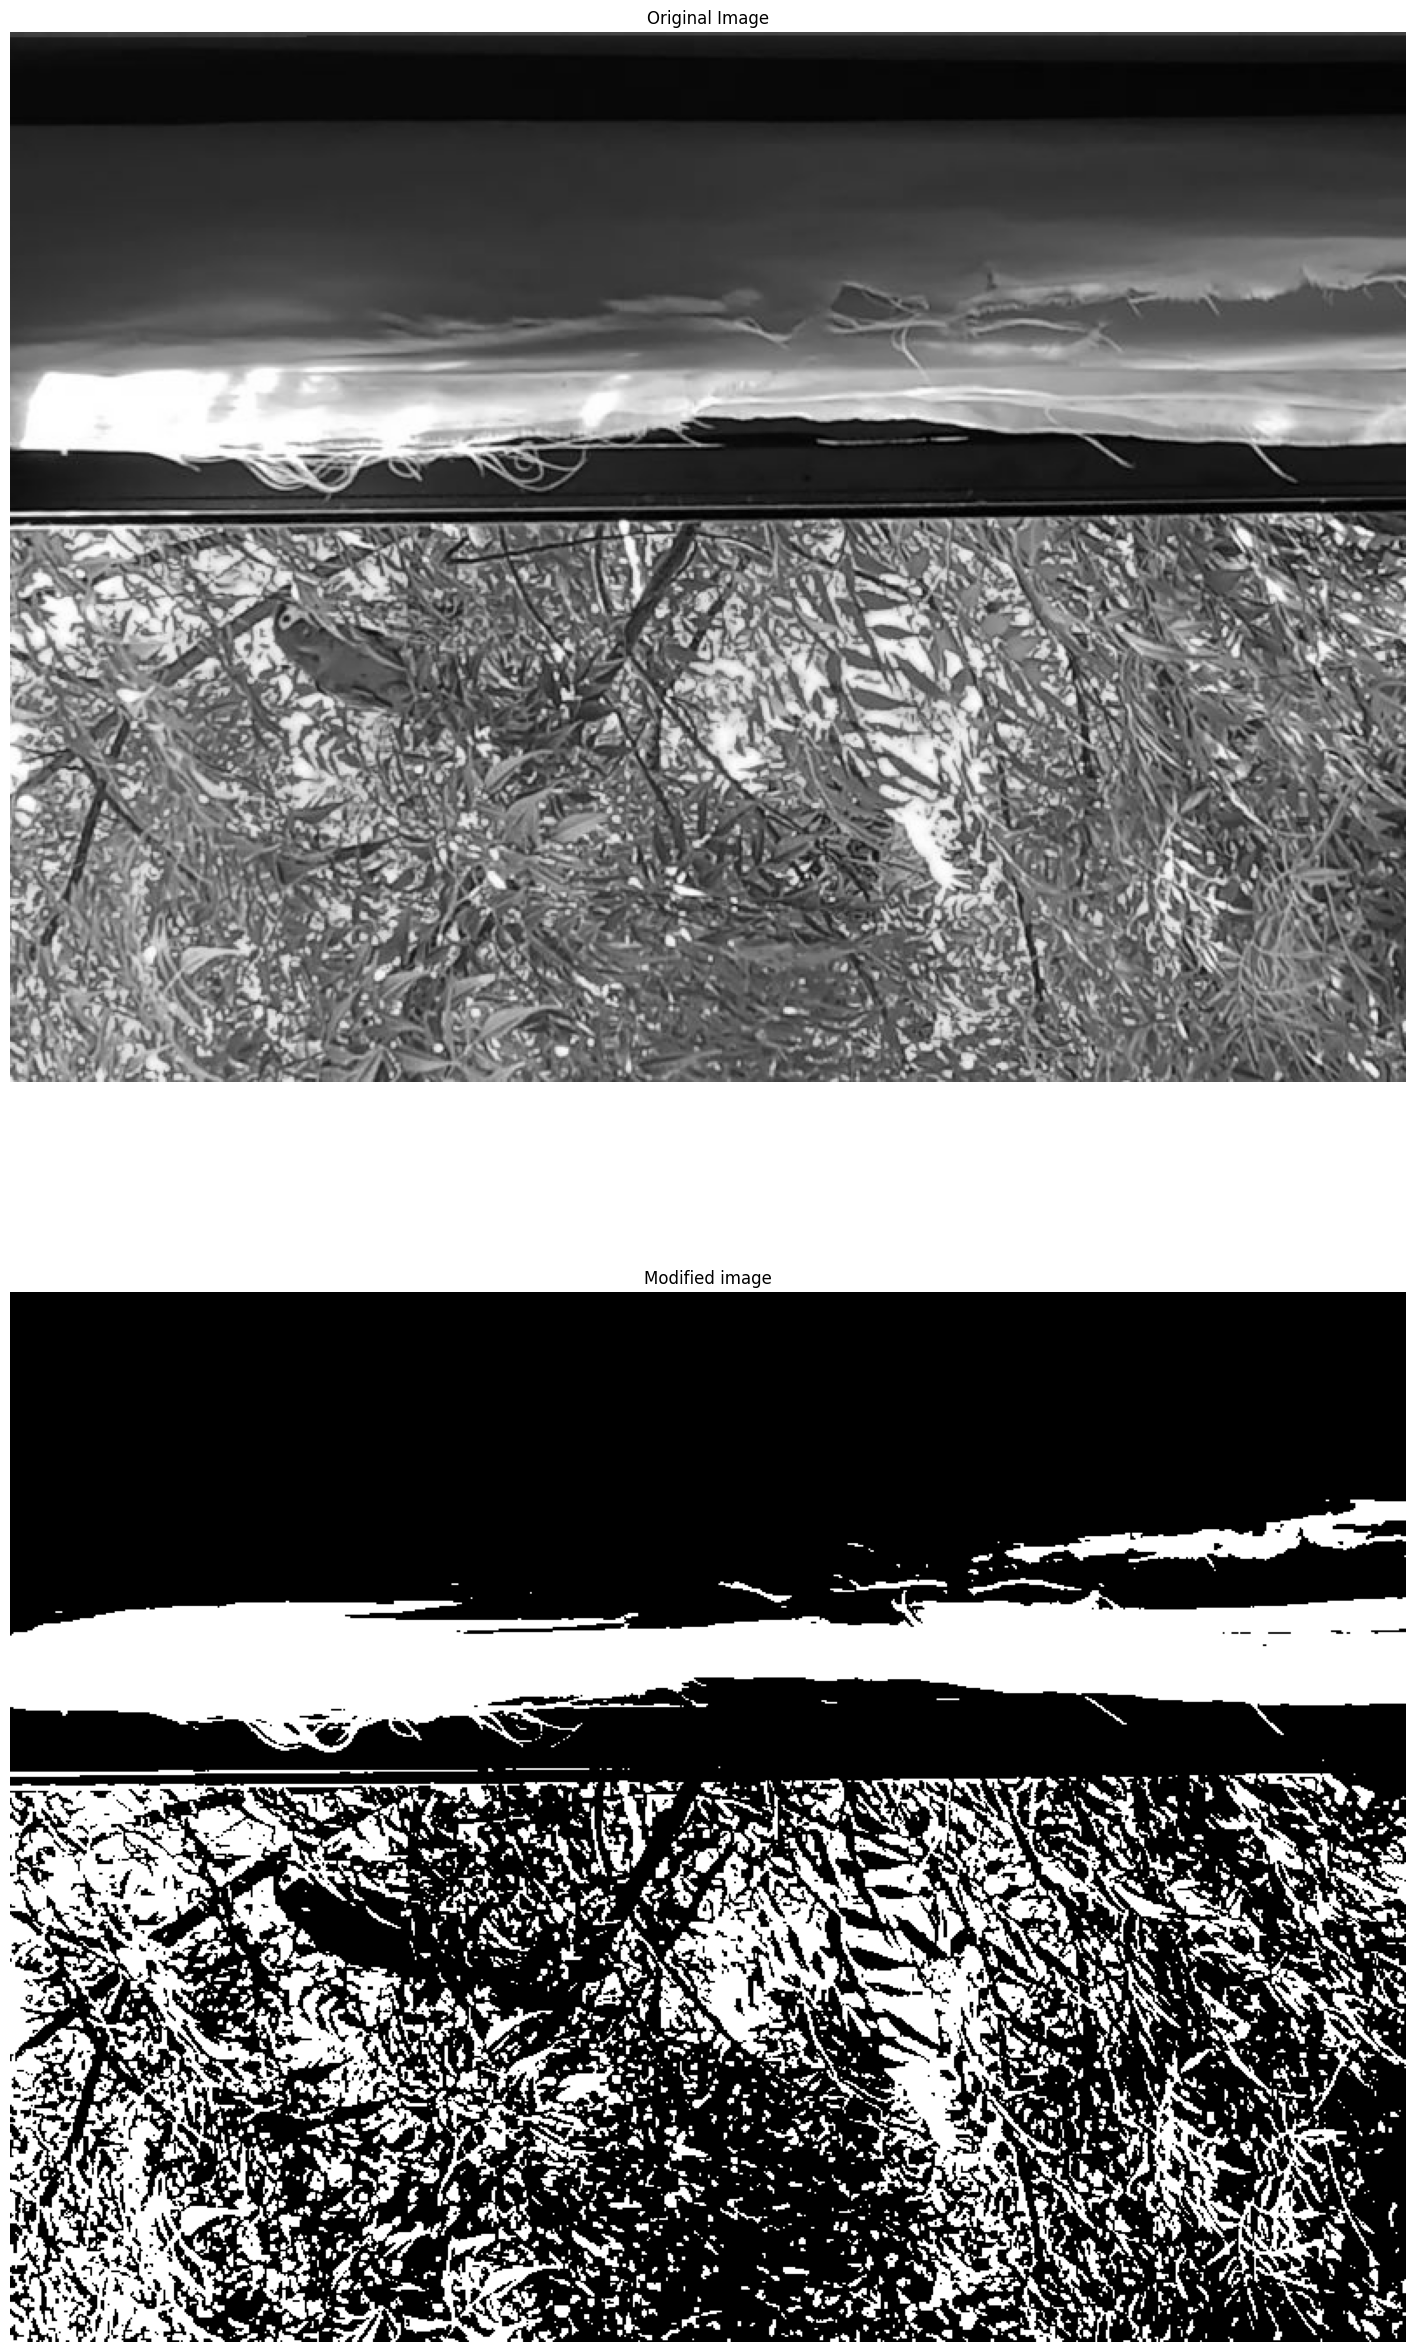

In [16]:
# Set the figure size in inches, adjusting the displayed widght and the height displayed

figura = plt.figure(figsize=(30, 30))

# Defining the display form, with two images, one on top of the other

linhas = 2
colunas = 1

# Creating the first subplot to be displayed

figura.add_subplot(linhas, colunas, 1) # Position of the subplot
plt.imshow(Im) # Define the data that will be displayed as an image
plt.axis('off') # Disables the values displayed on the numeric axes
plt.title("Original Image") # Image title

# Creating the second subplot to be displayed in the same way as the previous one

figura.add_subplot(linhas, colunas, 2)
plt.imshow(Im_modificada)
plt.axis('off')
plt.title("Modified image")
plt.grid()

# EXIBIÇÃO DOS SUBPLOTS

plt.show()